In [167]:
# Import the necessary Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
#Import data into environment

data= pd.read_csv('Assignment1_StreamFlow_Subscription_Data.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

(1000, 17)

In [169]:
# Display the first few rows of the dataframe
data.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [170]:
# Data Cleaning - Step

# Convert date columns to datetime format
data['Subscription_Start_Date'] = pd.to_datetime(data['Subscription_Start_Date'])
data['Date_of_Churn'] = pd.to_datetime(data['Date_of_Churn'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

In [171]:
# Checking for missing values
missing_values = data.isnull().sum()

# Displaying missing values
missing_values

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [172]:
# Replace missing values in Date_of_Churn and Reason_for_Churn
data['Date_of_Churn'].fillna('Not Churned', inplace=True)
data['Reason_for_Churn'].fillna('Not Churned', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18200\2732224881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Date_of_Churn'].fillna('Not Churned', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18200\2732224881.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Churned' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data['Date_of_Churn'].fillna('Not Churned', inplace=True

In [173]:
# To identify and get some idea about key metrics for analysis
data.describe(include=['O'])

,Gender,Location,Subscription_Type,Payment_Method,Favorite_Genre,Devices_Used,Date_of_Churn,Reason_for_Churn
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,5,3,3,5,4,247,5
top,Other,West,Standard,Credit Card,Drama,Mobile,Not Churned,Not Churned
freq,336,216,530,613,212,408,754,754


In [174]:
missing_values = data.isnull().sum()
missing_values

User_ID                    0
Age                        0
Gender                     0
Location                   0
Subscription_Start_Date    0
Subscription_Type          0
Monthly_Payment            0
Payment_Method             0
Monthly_Hours_Watched      0
Favorite_Genre             0
Devices_Used               0
Average_Session_Length     0
Content_ID                 0
Rating_Given               0
Churned                    0
Date_of_Churn              0
Reason_for_Churn           0
dtype: int64

Descriptive Analysis

In [175]:
# Generate basic statistics for numerical columns
numerical_stats = data.describe()
print(numerical_stats)

           User_ID          Age        Subscription_Start_Date  \
count  1000.000000  1000.000000                           1000   
mean    500.500000    44.385000  2021-09-18 17:08:01.662466560   
min       1.000000    18.000000     2019-05-10 01:53:37.659073   
25%     250.750000    31.750000  2020-05-15 19:53:37.664891136   
50%     500.500000    45.000000  2021-08-21 01:53:37.662536448   
75%     750.250000    57.000000  2023-01-09 07:53:37.664328192   
max    1000.000000    70.000000     2024-05-06 01:53:37.662112   
std     288.819436    15.321669                            NaN   

       Monthly_Payment  Monthly_Hours_Watched  Average_Session_Length  \
count      1000.000000            1000.000000             1000.000000   
mean         14.580000              19.071653                1.893771   
min           9.990000               0.041574                0.000486   
25%           9.990000               5.490739                0.548918   
50%          14.990000              13.3

In [176]:
# Analyze the distribution of categorical variables
categorical_stats = data.describe(include=['object'])

numerical_stats, categorical_stats

(           User_ID          Age        Subscription_Start_Date  \
 count  1000.000000  1000.000000                           1000   
 mean    500.500000    44.385000  2021-09-18 17:08:01.662466560   
 min       1.000000    18.000000     2019-05-10 01:53:37.659073   
 25%     250.750000    31.750000  2020-05-15 19:53:37.664891136   
 50%     500.500000    45.000000  2021-08-21 01:53:37.662536448   
 75%     750.250000    57.000000  2023-01-09 07:53:37.664328192   
 max    1000.000000    70.000000     2024-05-06 01:53:37.662112   
 std     288.819436    15.321669                            NaN   
 
        Monthly_Payment  Monthly_Hours_Watched  Average_Session_Length  \
 count      1000.000000            1000.000000             1000.000000   
 mean         14.580000              19.071653                1.893771   
 min           9.990000               0.041574                0.000486   
 25%           9.990000               5.490739                0.548918   
 50%          14.990000  

In [177]:
# Percentage of users churned

churned_users = data[data['Churned'] == 1]
not_churned_users = data[data['Churned'] == 0]

print ("Churned Users: %i (%.1f%%)"%(len(churned_users), float(len(churned_users))/len(data)*100.0))
print ("Not-churned Users: %i (%.1f%%)"%(len(not_churned_users), float(len(not_churned_users))/len(data)*100.0))
print ("Total: %i"%len(data))

Churned Users: 246 (24.6%)
Not-churned Users: 754 (75.4%)
Total: 1000


<Axes: xlabel='Subscription_Type', ylabel='Churned'>

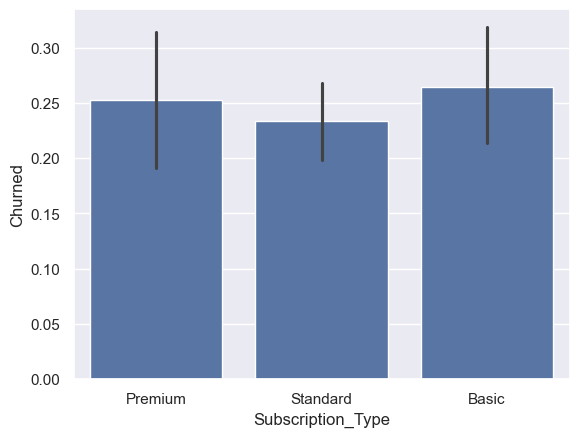

In [178]:
data.Subscription_Type.value_counts()
data.groupby('Subscription_Type').Churned.value_counts()
data[['Subscription_Type', 'Churned']].groupby(['Subscription_Type'], as_index=False).mean()
sns.barplot(x='Subscription_Type', y='Churned', data=data)

<Axes: xlabel='Location', ylabel='Churned'>

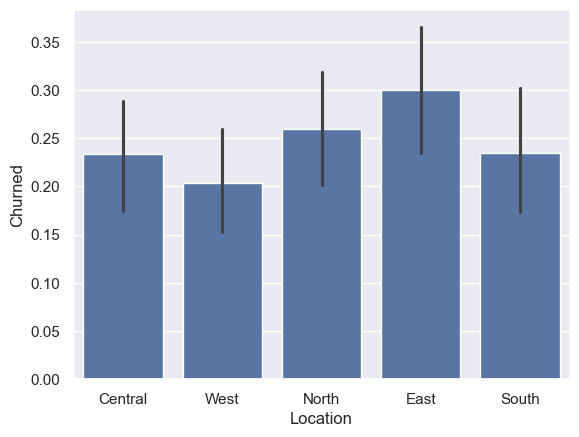

In [179]:
data.Location.value_counts()
data.groupby('Location').Churned.value_counts()
data[['Location', 'Churned']].groupby(['Location'], as_index=False).mean()
sns.barplot(x='Location', y='Churned', data=data)

<Axes: xlabel='Favorite_Genre', ylabel='Churned'>

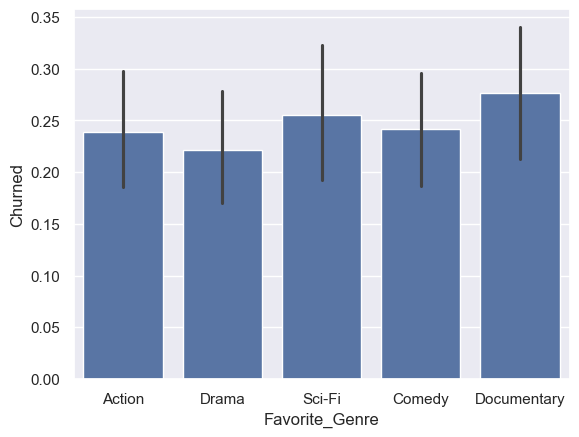

In [180]:
data.Favorite_Genre.value_counts()
data.groupby('Favorite_Genre').Churned.value_counts()
data[['Favorite_Genre', 'Churned']].groupby(['Favorite_Genre'], as_index=False).mean()
sns.barplot(x='Favorite_Genre', y='Churned', data=data)

<Axes: xlabel='Devices_Used', ylabel='Churned'>

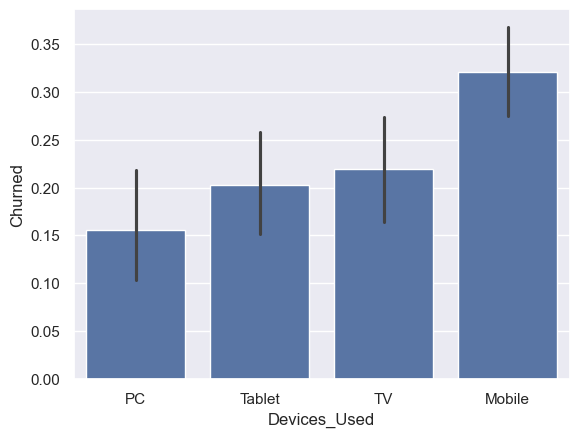

In [181]:
data.Devices_Used.value_counts()
data.groupby('Devices_Used').Churned.value_counts()
data[['Devices_Used', 'Churned']].groupby(['Devices_Used'], as_index=False).mean()
sns.barplot(x='Devices_Used', y='Churned', data=data)

<Axes: xlabel='Rating_Given', ylabel='Churned'>

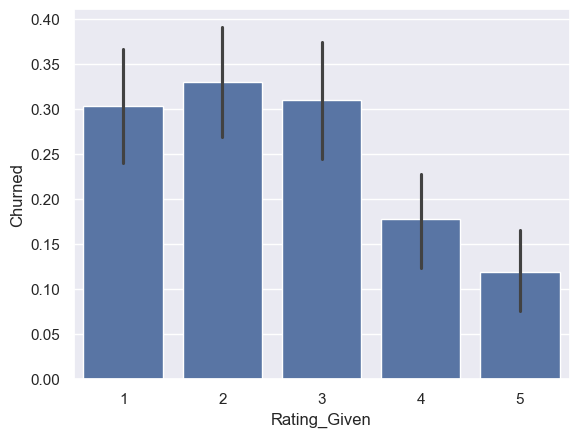

In [182]:
data.Rating_Given.value_counts()
data.groupby('Rating_Given').Churned.value_counts()
data[['Rating_Given', 'Churned']].groupby(['Rating_Given'], as_index=False).mean()
sns.barplot(x='Rating_Given', y='Churned', data=data)

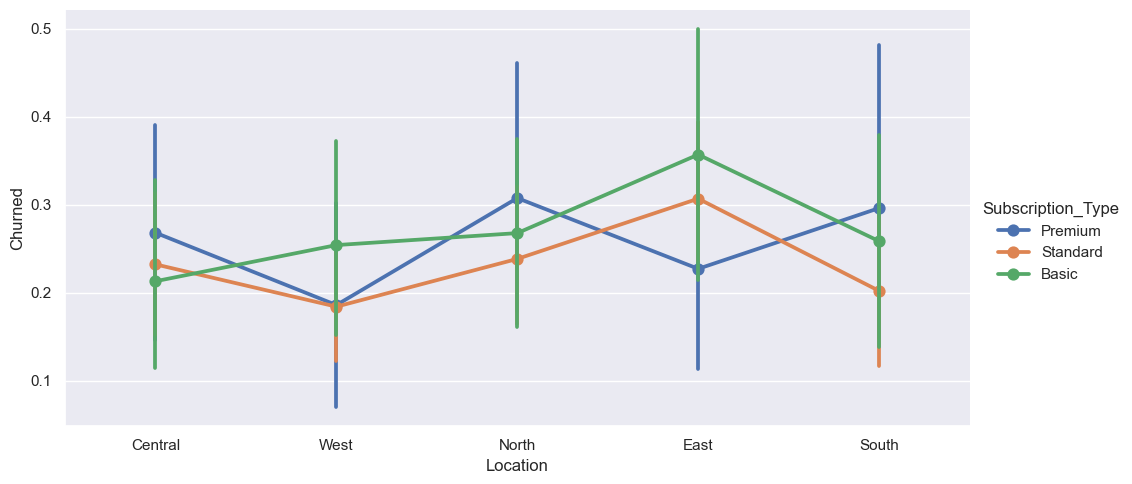

In [192]:
sns.catplot(x='Location', y='Churned', hue='Subscription_Type', kind='point', aspect=2, data=data)

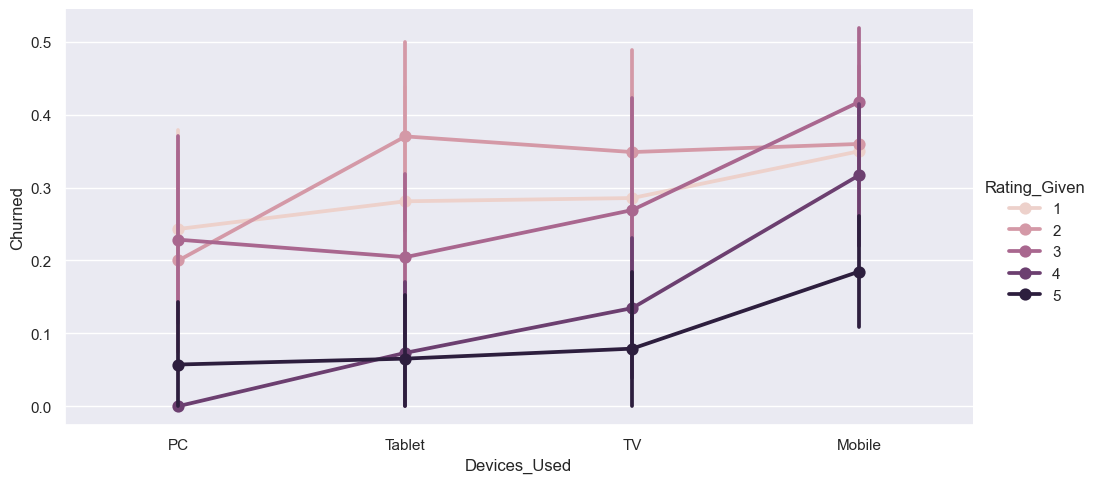

In [193]:
sns.catplot(x='Devices_Used', y='Churned', hue='Rating_Given', kind='point', aspect=2, data=data)

In [ ]:
# Completed upto here

In [ ]:
# Calculate churn rate
churn_rate = data['Churned'].mean()

In [ ]:
# 

In [ ]:

# Analyze churn by demographic factors
churn_by_age = data.groupby('Age')['Churned'].mean()
churn_by_gender = data.groupby('Gender')['Churned'].mean()
churn_by_location = data.groupby('Location')['Churned'].mean()


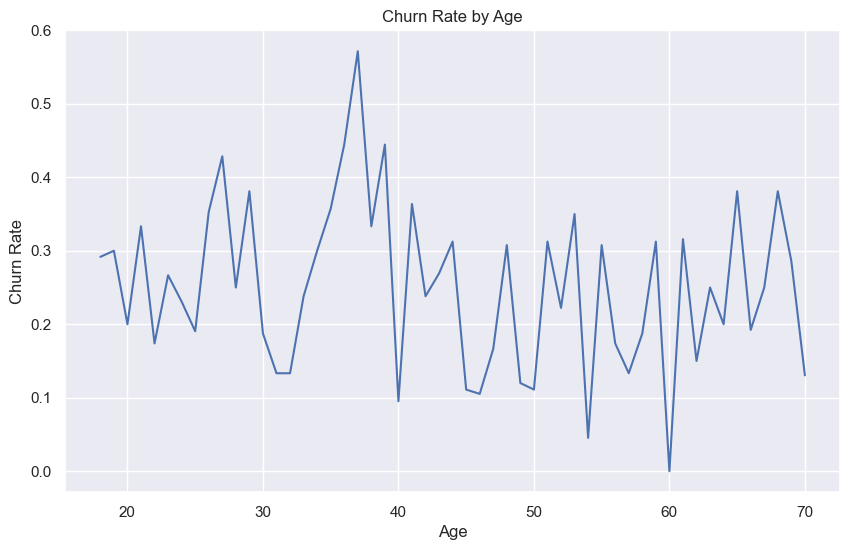

In [ ]:

# Plot churn by age
plt.figure(figsize=(10, 6))
sns.lineplot(x=churn_by_age.index, y=churn_by_age.values)
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()


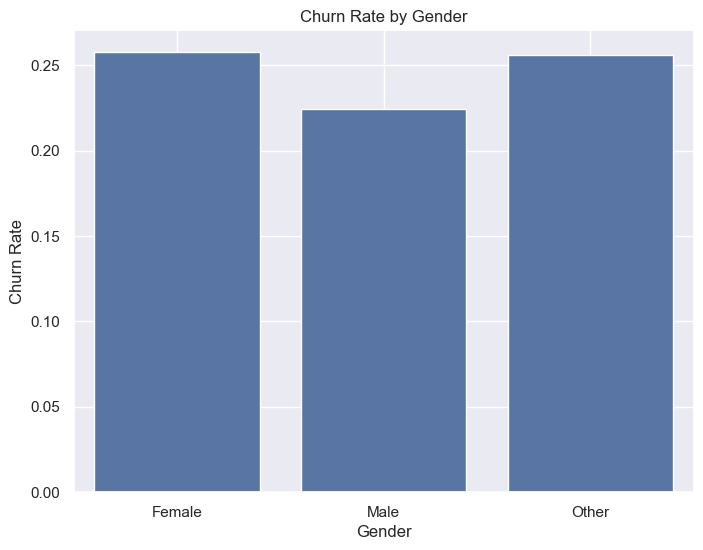

In [ ]:

# Plot churn by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()


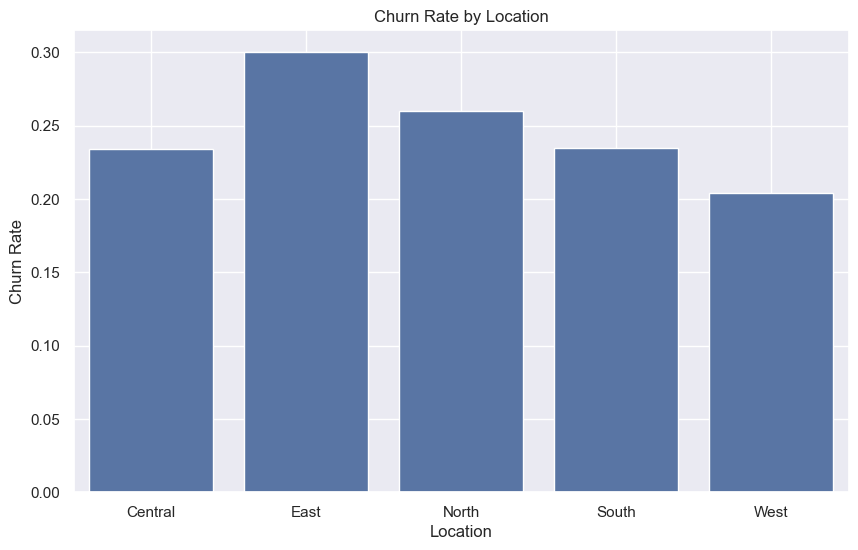

(0.246,
 Age
 18    0.291667
 19    0.300000
 20    0.200000
 21    0.333333
 22    0.173913
 23    0.266667
 24    0.230769
 25    0.190476
 26    0.352941
 27    0.428571
 28    0.250000
 29    0.380952
 30    0.187500
 31    0.133333
 32    0.133333
 33    0.238095
 34    0.300000
 35    0.357143
 36    0.444444
 37    0.571429
 38    0.333333
 39    0.444444
 40    0.095238
 41    0.363636
 42    0.238095
 43    0.269231
 44    0.312500
 45    0.111111
 46    0.105263
 47    0.166667
 48    0.307692
 49    0.120000
 50    0.111111
 51    0.312500
 52    0.222222
 53    0.350000
 54    0.045455
 55    0.307692
 56    0.173913
 57    0.133333
 58    0.187500
 59    0.312500
 60    0.000000
 61    0.315789
 62    0.150000
 63    0.250000
 64    0.200000
 65    0.380952
 66    0.192308
 67    0.250000
 68    0.380952
 69    0.285714
 70    0.130435
 Name: Churned, dtype: float64,
 Gender
 Female    0.257576
 Male      0.224551
 Other     0.255952
 Name: Churned, dtype: float64,
 Locati

In [ ]:

# Plot churn by location
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_location.index, y=churn_by_location.values)
plt.title('Churn Rate by Location')
plt.xlabel('Location')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

churn_rate, churn_by_age, churn_by_gender, churn_by_location


In [ ]:
# Analyze churn by subscription type
churn_by_subscription_type = data.groupby('Subscription_Type')['Churned'].mean()

In [ ]:

# Analyze churn by payment method
churn_by_payment_method = data.groupby('Payment_Method')['Churned'].mean()

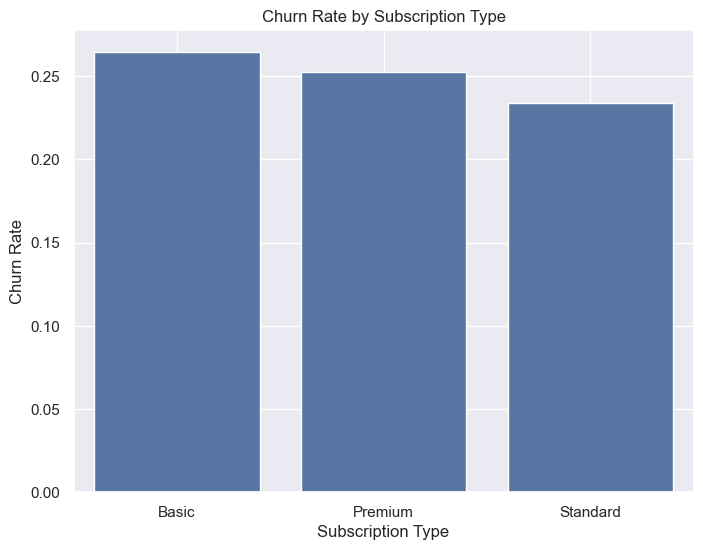

In [ ]:

# Plot churn by subscription type
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_subscription_type.index, y=churn_by_subscription_type.values)
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()


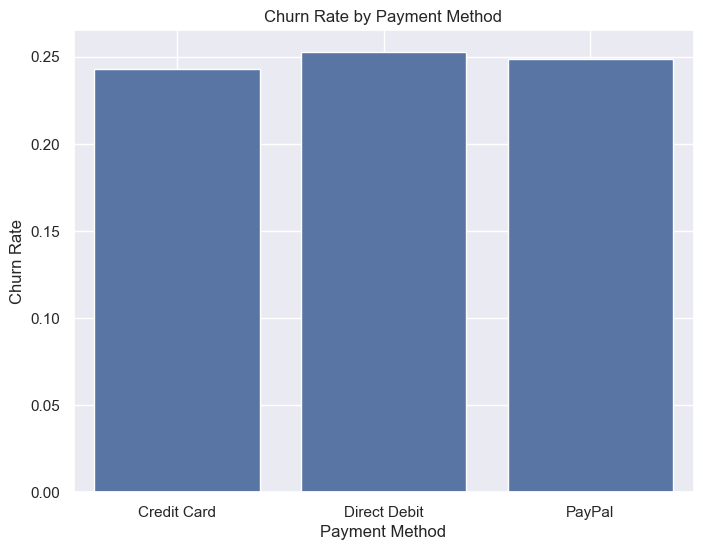

(Subscription_Type
 Basic       0.264493
 Premium     0.252577
 Standard    0.233962
 Name: Churned, dtype: float64,
 Payment_Method
 Credit Card     0.243067
 Direct Debit    0.252577
 PayPal          0.248705
 Name: Churned, dtype: float64)

In [ ]:

# Plot churn by payment method
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method.values)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

churn_by_subscription_type, churn_by_payment_method


In [ ]:
# Segment Analysis
segment_summary = data.groupby(['Subscription_Type', 'Location']).agg({
    'User_ID': 'count',
    'Monthly_Payment': 'mean',
    'Monthly_Hours_Watched': 'mean',
    'Average_Session_Length': 'mean',
    'Churned': 'mean'
}).reset_index()

In [ ]:
segment_summary.columns = ['Subscription_Type', 'Location', 'User_Count', 'Avg_Monthly_Payment', 'Avg_Monthly_Hours_Watched', 'Avg_Session_Length', 'Churn_Rate']
print("Segment Summary:\n", segment_summary)

Segment Summary:
    Subscription_Type Location  User_Count  Avg_Monthly_Payment  \
0              Basic  Central          61                 9.99   
1              Basic     East          42                 9.99   
2              Basic    North          56                 9.99   
3              Basic    South          58                 9.99   
4              Basic     West          59                 9.99   
5            Premium  Central          41                19.99   
6            Premium     East          44                19.99   
7            Premium    North          39                19.99   
8            Premium    South          27                19.99   
9            Premium     West          43                19.99   
10          Standard  Central          99                14.99   
11          Standard     East         114                14.99   
12          Standard    North         109                14.99   
13          Standard    South          94                1